## <font ,color = "turquoise">Cluster Analysis</font>
<img src = "https://espin086.files.wordpress.com/2011/02/2-variable-clustering.png",style = "height:300px; ">

In [3]:
from sklearn.cluster import MeanShift, KMeans
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

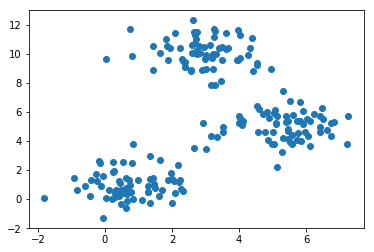

In [4]:
centers = [[1,1],[5,5],[3,10]]
X,_ = make_blobs(n_samples = 200, centers = centers,cluster_std = 1) # creates three cluster data from the centers
plt.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
ms = MeanShift().fit(X) # shows the ideal number of clusters in the data 
labels=ms.labels_

cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))
print("Number of estimated clusters:",n_clusters)
print(cluster_centers)


Number of estimated clusters: 3
[[ 5.34977758  5.08364506]
 [ 3.00480233 10.06432277]
 [ 0.79700129  0.95773585]]


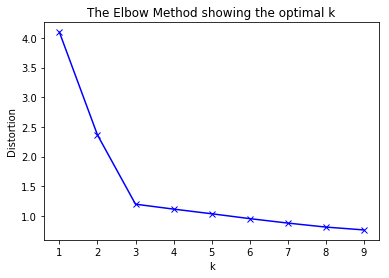

In [6]:
#Alternatively, use the elbow method to detect the ideal number of clusters that lie at the elbow


distortions = []
K = range(1,10)# fit 10 cluster analysis and plot them
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

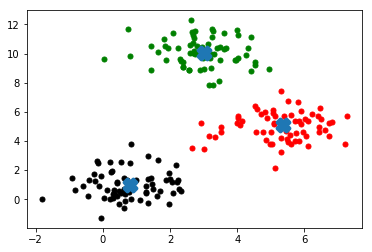

In [7]:
colors = 10*["r.","g.","k."]


for i in range(len(X)):
    plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize = 10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker = "X",s =140,linewidths = 4,zorder = 10)

In [8]:
#Create the clusters
cluster = KMeans(n_clusters = 3)
cluster.fit(X)
centers = cluster.cluster_centers_
labels = cluster.labels_
print(centers)

print(labels[0 : 20])

[[ 2.92541106 10.08199565]
 [ 0.75813448  0.98709984]
 [ 5.27234556  4.99394382]]
[0 2 0 2 0 1 0 2 1 0 1 1 2 1 2 2 0 1 0 2]


In [9]:
#add the clusters to the original data as the labels or targets
# the role of cluster analysis is to help the data scientist find labels for the data.
import pandas as pd
G= pd.DataFrame(X,columns = ["feature1","feature2"])
G["Targets"] = labels
G.head()

,feature1,feature2,Targets
0,2.754275,9.982690,0
1,6.829474,5.296696,2
2,2.750869,11.517591,0
3,5.589528,3.774542,2
4,2.556111,8.839472,0


In [10]:
# investigate the characteristics of the features
#You can use mean as the explanatory variable
mean = G.groupby("Targets").mean()

mean

,feature1,feature2
Targets,,
0,2.925411,10.081996
1,0.758134,0.987100
2,5.272346,4.993944


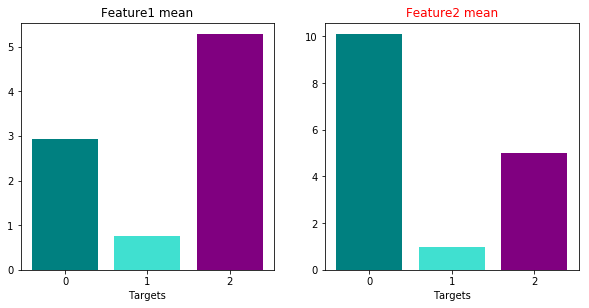

In [11]:
# With the means, You can plot the features to see them better

import matplotlib.pyplot as plt
color = ["teal", "turquoise","purple"]
H = plt.figure(figsize = (10,10))
H.add_subplot(221)
plt.bar(range(3),mean.feature1 , color = color)
plt.title("Feature1 mean")
plt.xlabel("Targets")
plt.xticks(range(3))


H.add_subplot(222)
plt.bar(range(3),mean.feature2 , color = color)
plt.title("Feature2 mean",color = "red")
plt.xlabel("Targets")
plt.xticks(range(3))

plt.show()

In [12]:
print(" the graphs show that cluster 2 has higher feature1 mean")
print(" the graphs show that cluster 1 has higher feature2 mean")
print(" these can help you create better labels for your data in practise")

 the graphs show that cluster 2 has higher feature1 mean
 the graphs show that cluster 1 has higher feature2 mean
 these can help you create better labels for your data in practise
